In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import math
from sklearn.metrics import mean_squared_error 

In [2]:
X_train = pd.read_csv('Train_MM_OH.csv')
X_train = X_train.drop('LoanApproved' , axis=1)
y_train = X_train['RiskScore']
X_train = X_train.drop('RiskScore' , axis=1)
X_train.head()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MaritalStat_Widowed,HomeStat_Mortgage,HomeStat_Other,HomeStat_Own,HomeStat_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,0.629032,0.068100,0.455285,0.573770,0.067100,0.111111,0.4,0.123388,0.395935,0.153846,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.209677,0.063154,0.661247,0.098361,0.213760,0.666667,0.8,0.089578,0.521424,0.153846,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.354839,0.152409,0.720867,0.295082,0.077842,0.222222,0.8,0.161380,0.172911,0.076923,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.661290,0.409754,0.875339,0.590164,0.088966,0.444444,0.0,0.123039,0.317895,0.153846,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.225806,0.083607,0.626016,0.196721,0.185708,0.333333,0.2,0.171140,0.203913,0.076923,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
X_validation = pd.read_csv('Valid_MM_OH.csv')
X_validation = X_validation.drop('LoanApproved' , axis=1)
y_validation = X_validation['RiskScore']
X_validation = X_validation.drop('RiskScore' , axis=1)
X_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             4000 non-null   float64
 1   AnnualIncome                    4000 non-null   float64
 2   CreditScore                     4000 non-null   float64
 3   Experience                      4000 non-null   float64
 4   LoanAmount                      4000 non-null   float64
 5   LoanDuration                    4000 non-null   float64
 6   NumberOfDependents              4000 non-null   float64
 7   MonthlyDebtPayments             4000 non-null   float64
 8   CreditCardUtilizationRate       4000 non-null   float64
 9   NumberOfOpenCreditLines         4000 non-null   float64
 10  NumberOfCreditInquiries         4000 non-null   float64
 11  DebtToIncomeRatio               4000 non-null   float64
 12  BankruptcyHistory               40

In [4]:
X_test = pd.read_csv('Test_MM_OH.csv')
X_test = X_test.drop('LoanApproved' , axis=1)
y_test = X_test['RiskScore']
X_test = X_test.drop('RiskScore' , axis=1)

In [5]:
y_validation.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4000 entries, 0 to 3999
Series name: RiskScore
Non-Null Count  Dtype  
--------------  -----  
4000 non-null   float64
dtypes: float64(1)
memory usage: 31.4 KB


In [6]:
class SingleLayer(nn.Module):
    def __init__(self,hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(49, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1)
        )
    def forward(self, x):
        return self.layers(x)

In [7]:
X_training = X_train.values
y_training = y_train.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_test.values
y_testing = y_test.values

In [8]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

In [9]:
print(X_training.shape)

(12000, 49)


Training Losses for hidden layer 8
          0
0  0.930530
1  0.910408
2  0.890587
3  0.871070
4  0.851861
 RMSE for validation set is : 0.11457601075905416
 RMSE for test set is : 0.11276133618042289
Training Losses for hidden layer 16
          0
0  0.036092
1  0.032662
2  0.029636
3  0.027021
4  0.024820
 RMSE for validation set is : 0.06535180637909234
 RMSE for test set is : 0.06493153532917254
Training Losses for hidden layer 32
          0
0  0.164358
1  0.144921
2  0.126944
3  0.110446
4  0.095439
 RMSE for validation set is : 0.06637110902315613
 RMSE for test set is : 0.0659070500408485
Training Losses for hidden layer 64
          0
0  0.299065
1  0.253485
2  0.212114
3  0.175003
4  0.142173
 RMSE for validation set is : 0.06617475930653118
 RMSE for test set is : 0.0659797202608671
Training Losses for hidden layer 128
          0
0  0.020448
1  0.020971
2  0.019818
3  0.018575
4  0.019118
 RMSE for validation set is : 0.06566874757422536
 RMSE for test set is : 0.0657419751

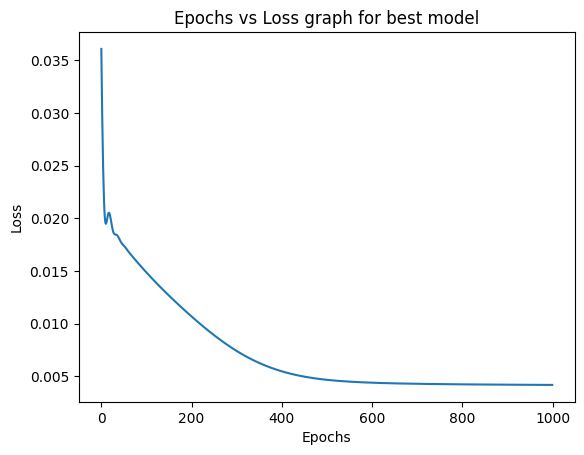

In [10]:
nuerons = [8,16,32,64,128,256]
min_err = 10000
again_loss = []
epochs = 1000
opt_degree = 0
for nueron in nuerons:
    model = SingleLayer(hidden1=nueron)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss_arr = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        model.train()
        output = model(X_train)
        loss=criterion(y_train.float(), output)
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
    print(f"Training Losses for hidden layer {nueron}")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val).detach().numpy()
    rmse =math.sqrt(mean_squared_error(y_val,y_val_pred))
    min_err = min(min_err,rmse)
    if rmse == min_err:
        again_loss = loss_arr
        opt_degree = nueron
    y_test_pred = model(X_test).detach().numpy()
    rmse_2 = math.sqrt(mean_squared_error(y_test,y_test_pred))
    print(f" RMSE for validation set is : {rmse}")
    print(f" RMSE for test set is : {rmse_2}")
print(f"The Least Validation is {min_err} for Hidden Layer of Size {opt_degree}")
plt.plot(range(epochs), again_loss)
plt.title('Epochs vs Loss graph for best model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()  
    
 

In [11]:
class DoubleLayer(nn.Module):
    def __init__(self, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(49, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1)
        )
    def forward(self, x):
        return self.layers(x)

Training Losses for hidden layer 8
          0
0  0.145894
1  0.141147
2  0.136485
3  0.131909
4  0.127421
 RMSE for validation set is : 0.08740520206231689
 RMSE for test set is : 0.0849703202602335
Training Losses for hidden layer 16
          0
0  0.627057
1  0.609280
2  0.591777
3  0.574552
4  0.557609
 RMSE for validation set is : 0.11030820399853486
 RMSE for test set is : 0.10806022755305769
Training Losses for hidden layer 32
          0
0  0.505997
1  0.478406
2  0.451680
3  0.425829
4  0.400861
 RMSE for validation set is : 0.08817863693331368
 RMSE for test set is : 0.085857912620399
Training Losses for hidden layer 64
          0
0  0.170207
1  0.141445
2  0.115836
3  0.093417
4  0.074194
 RMSE for validation set is : 0.0658254185628858
 RMSE for test set is : 0.06449078413362386


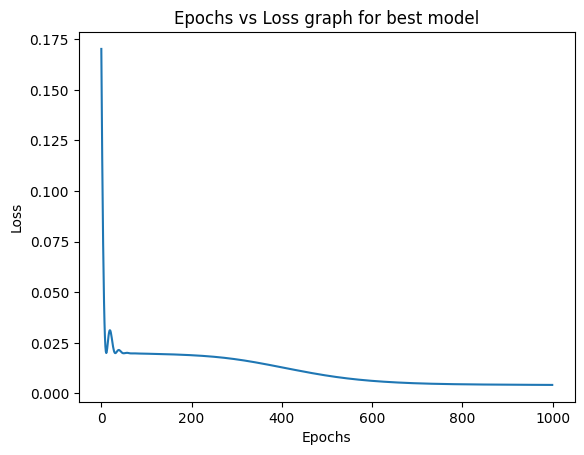

Training Losses for hidden layer 8
          0
0  0.064415
1  0.061210
2  0.058120
3  0.055148
4  0.052295
 RMSE for validation set is : 0.06520999849890366
 RMSE for test set is : 0.06383379769184888
Training Losses for hidden layer 16
          0
0  0.021471
1  0.020587
2  0.020082
3  0.019920
4  0.019999
 RMSE for validation set is : 0.06285818104246543
 RMSE for test set is : 0.062327287873933886
Training Losses for hidden layer 32
          0
0  0.156846
1  0.140019
2  0.124346
3  0.109836
4  0.096494
 RMSE for validation set is : 0.06569772944822642
 RMSE for test set is : 0.06447601995444406
Training Losses for hidden layer 64
          0
0  0.032748
1  0.025040
2  0.020810
3  0.019713
4  0.020734
 RMSE for validation set is : 0.06379330178895008
 RMSE for test set is : 0.0632514556752124


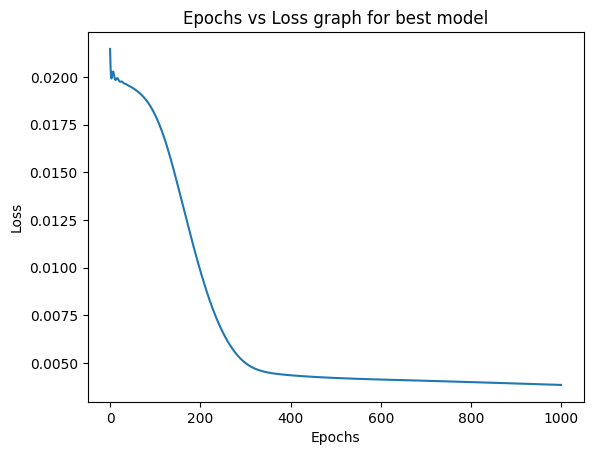

Training Losses for hidden layer 8
          0
0  0.041367
1  0.037984
2  0.034894
3  0.032103
4  0.029615
 RMSE for validation set is : 0.06448043981380348
 RMSE for test set is : 0.06351887686406253
Training Losses for hidden layer 16
          0
0  0.177537
1  0.164463
2  0.151965
3  0.140051
4  0.128729
 RMSE for validation set is : 0.06652038246885676
 RMSE for test set is : 0.06522931547588584
Training Losses for hidden layer 32
          0
0  0.107148
1  0.090545
2  0.075757
3  0.062800
4  0.051671
 RMSE for validation set is : 0.06507896611126933
 RMSE for test set is : 0.06425579525874134
Training Losses for hidden layer 64
          0
0  0.161765
1  0.124566
2  0.093182
3  0.067652
4  0.047912
 RMSE for validation set is : 0.06524316691354491
 RMSE for test set is : 0.06454912535582162


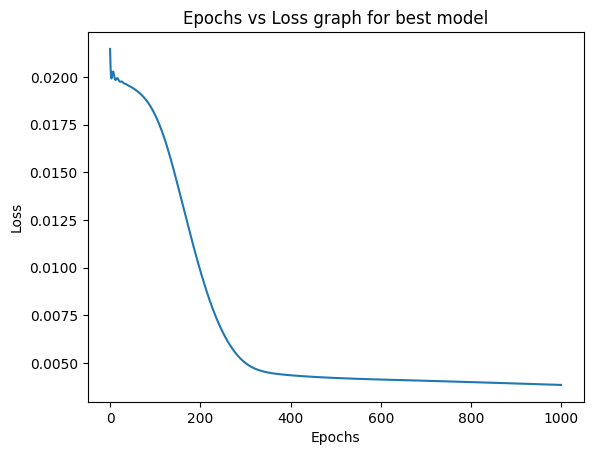

Training Losses for hidden layer 8
          0
0  0.093967
1  0.083859
2  0.074484
3  0.065864
4  0.058012
 RMSE for validation set is : 0.06501951396411358
 RMSE for test set is : 0.06412596829582132
Training Losses for hidden layer 16
          0
0  0.048922
1  0.040204
2  0.033081
3  0.027560
4  0.023606
 RMSE for validation set is : 0.06462657953675614
 RMSE for test set is : 0.06403216975665303
Training Losses for hidden layer 32
          0
0  0.020462
1  0.019825
2  0.020265
3  0.019924
4  0.019634
 RMSE for validation set is : 0.06373885689029116
 RMSE for test set is : 0.06328462780073177
Training Losses for hidden layer 64
          0
0  0.310967
1  0.246090
2  0.189741
3  0.141939
4  0.102620
 RMSE for validation set is : 0.0657483142914997
 RMSE for test set is : 0.06519927191096497


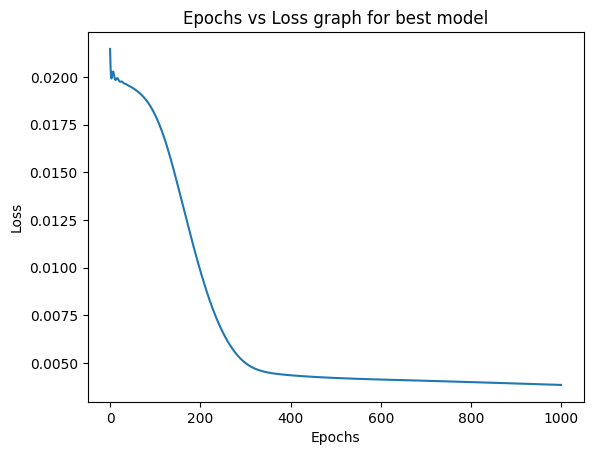

The Least Validation is 0.06285818104246543 for Hidden Layer of Size 16 & 16


In [12]:
nuerons = [8,16,32,64]
min_err = 10000
best_fn = 0
best_sn = 0
again_loss = []
epochs = 1000
opt_degree = 0
for firstn in nuerons:
    for nueron in nuerons:
        model = DoubleLayer(hidden1=firstn, hidden2 = nueron)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        loss_arr = []
        for epoch in range(epochs):
            optimizer.zero_grad()
            model.train()
            output = model(X_train)
            loss=criterion(y_train.float(), output)
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
        print(f"Training Losses for hidden layer {nueron}")
        loss_df = pd.DataFrame(loss_arr)
        print(loss_df.head())
        y_val_pred=model(X_val).detach().numpy()
        rmse =math.sqrt(mean_squared_error(y_val,y_val_pred))
        min_err = min(min_err,rmse)
        if rmse == min_err:
            again_loss = loss_arr
            best_sn = nueron
            best_fn = firstn
        y_test_pred = model(X_test).detach().numpy()
        rmse_2 = math.sqrt(mean_squared_error(y_test,y_test_pred))
        print(f" RMSE for validation set is : {rmse}")
        print(f" RMSE for test set is : {rmse_2}")
    plt.plot(range(epochs), again_loss)
    plt.title('Epochs vs Loss graph for best model')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()  
print(f"The Least Validation is {min_err} for Hidden Layer of Size {best_fn} & {best_sn}")
 

In [13]:
class TripleLayer(nn.Module):
    def __init__(self, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(49, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1)
        )
    def forward(self, x):
        return self.layers(x)

Training Losses for hidden layer 8
          0
0  0.390931
1  0.381677
2  0.372542
3  0.363526
4  0.354632
 RMSE for validation set is : 0.13095323555698968 for combination 8 & 8 & 8
 RMSE for test set is : 0.12858908098998656 for combination 8 & 8 & 8
Training Losses for hidden layer 16
          0
0  0.612972
1  0.594701
2  0.576737
3  0.559086
4  0.541752
 RMSE for validation set is : 0.13318183678473536 for combination 8 & 8 & 16
 RMSE for test set is : 0.13083339547147713 for combination 8 & 8 & 16
Training Losses for hidden layer 32
          0
0  0.060879
1  0.052469
2  0.045047
3  0.038625
4  0.033206
 RMSE for validation set is : 0.06350577122569108 for combination 8 & 8 & 32
 RMSE for test set is : 0.06205954359550689 for combination 8 & 8 & 32
Training Losses for hidden layer 64
          0
0  0.021275
1  0.019791
2  0.020426
3  0.020610
4  0.020163
 RMSE for validation set is : 0.061746441010156104 for combination 8 & 8 & 64
 RMSE for test set is : 0.06089618310737898 for c

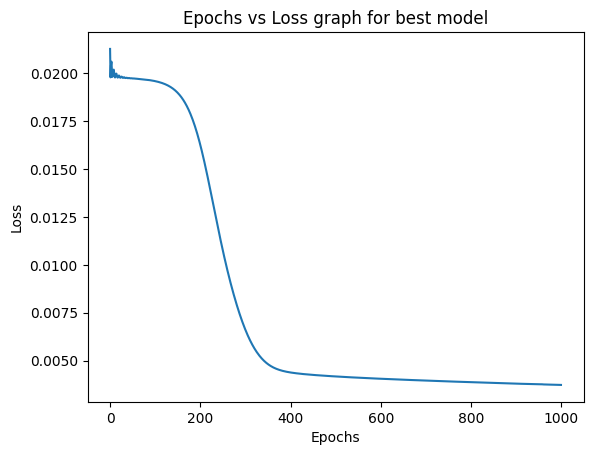

Training Losses for hidden layer 8
          0
0  0.031836
1  0.029722
2  0.027822
3  0.026138
4  0.024669
 RMSE for validation set is : 0.06354924588978107 for combination 8 & 16 & 8
 RMSE for test set is : 0.06220821352543337 for combination 8 & 16 & 8
Training Losses for hidden layer 16
          0
0  0.043478
1  0.039875
2  0.036575
3  0.033583
4  0.030903
 RMSE for validation set is : 0.06295437972441455 for combination 8 & 16 & 16
 RMSE for test set is : 0.06156604290706092 for combination 8 & 16 & 16
Training Losses for hidden layer 32
          0
0  0.041871
1  0.035000
2  0.029457
3  0.025236
4  0.022298
 RMSE for validation set is : 0.06285368414949573 for combination 8 & 16 & 32
 RMSE for test set is : 0.061566339777877975 for combination 8 & 16 & 32
Training Losses for hidden layer 64
          0
0  0.099474
1  0.077002
2  0.058408
3  0.043685
4  0.032740
 RMSE for validation set is : 0.06394574921376701 for combination 8 & 16 & 64
 RMSE for test set is : 0.0625724149449111

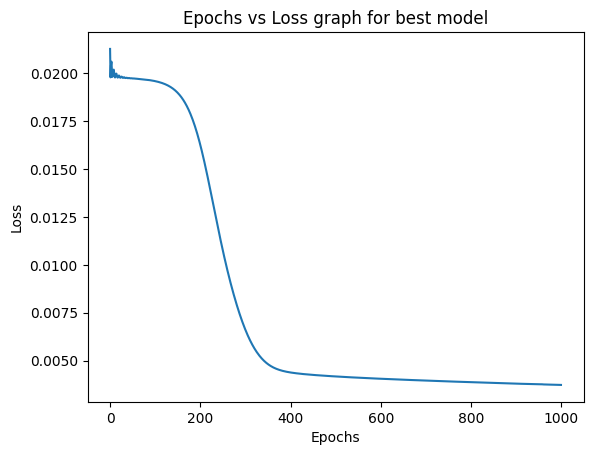

Training Losses for hidden layer 8
          0
0  0.162484
1  0.154875
2  0.147502
3  0.140370
4  0.133479
 RMSE for validation set is : 0.08548977842930743 for combination 8 & 32 & 8
 RMSE for test set is : 0.08284906185266623 for combination 8 & 32 & 8
Training Losses for hidden layer 16
          0
0  0.702288
1  0.673915
2  0.646228
3  0.619234
4  0.592940
 RMSE for validation set is : 0.12467205345709009 for combination 8 & 32 & 16
 RMSE for test set is : 0.12228128131892375 for combination 8 & 32 & 16
Training Losses for hidden layer 32
          0
0  0.064819
1  0.053358
2  0.043617
3  0.035620
4  0.029356
 RMSE for validation set is : 0.06299473115884735 for combination 8 & 32 & 32
 RMSE for test set is : 0.06184245083689051 for combination 8 & 32 & 32
Training Losses for hidden layer 64
          0
0  0.068775
1  0.048399
2  0.033670
3  0.024450
4  0.020256
 RMSE for validation set is : 0.06377119862478213 for combination 8 & 32 & 64
 RMSE for test set is : 0.06258969278608413

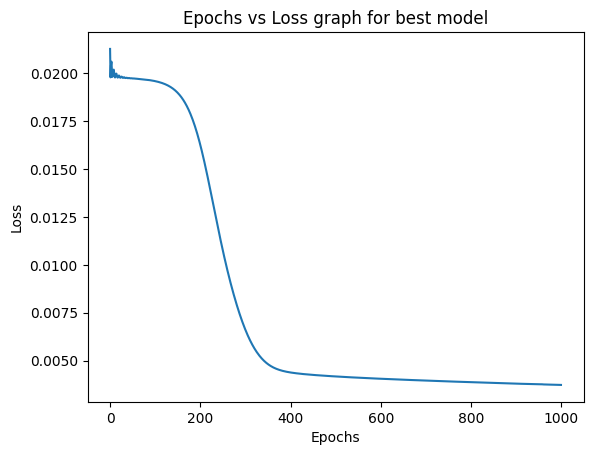

Training Losses for hidden layer 8
          0
0  0.318765
1  0.301277
2  0.284325
3  0.267923
4  0.252083
 RMSE for validation set is : 0.09421729807897425 for combination 8 & 64 & 8
 RMSE for test set is : 0.09149304796768164 for combination 8 & 64 & 8
Training Losses for hidden layer 16
          0
0  0.095261
1  0.081235
2  0.068687
3  0.057641
4  0.048107
 RMSE for validation set is : 0.06403989247585502 for combination 8 & 64 & 16
 RMSE for test set is : 0.06273332643642102 for combination 8 & 64 & 16
Training Losses for hidden layer 32
          0
0  0.775239
1  0.702972
2  0.634655
3  0.570326
4  0.510006
 RMSE for validation set is : 0.0744620088618867 for combination 8 & 64 & 32
 RMSE for test set is : 0.07230840847038422 for combination 8 & 64 & 32
Training Losses for hidden layer 64
          0
0  0.057550
1  0.036494
2  0.024150
3  0.019835
4  0.021476
 RMSE for validation set is : 0.0622753430713737 for combination 8 & 64 & 64
 RMSE for test set is : 0.061351344320472054 

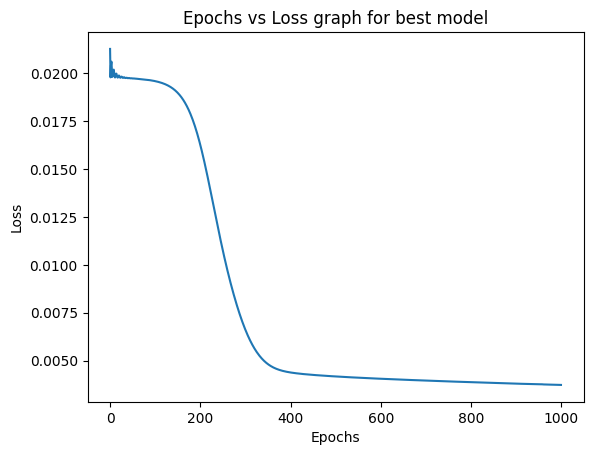

Training Losses for hidden layer 8
          0
0  0.167985
1  0.162670
2  0.157468
3  0.152382
4  0.147411
 RMSE for validation set is : 0.1075170831981953 for combination 16 & 8 & 8
 RMSE for test set is : 0.10526713775299745 for combination 16 & 8 & 8
Training Losses for hidden layer 16
          0
0  0.148820
1  0.139993
2  0.131477
3  0.123278
4  0.115401
 RMSE for validation set is : 0.06743569648472629 for combination 16 & 8 & 16
 RMSE for test set is : 0.06561666787704012 for combination 16 & 8 & 16
Training Losses for hidden layer 32
          0
0  0.035406
1  0.030680
2  0.026832
3  0.023865
4  0.021757
 RMSE for validation set is : 0.06162035022716256 for combination 16 & 8 & 32
 RMSE for test set is : 0.06054305441400099 for combination 16 & 8 & 32
Training Losses for hidden layer 64
          0
0  0.190730
1  0.162198
2  0.136362
3  0.113253
4  0.092881
 RMSE for validation set is : 0.06403320241523476 for combination 16 & 8 & 64
 RMSE for test set is : 0.06255467452302457 

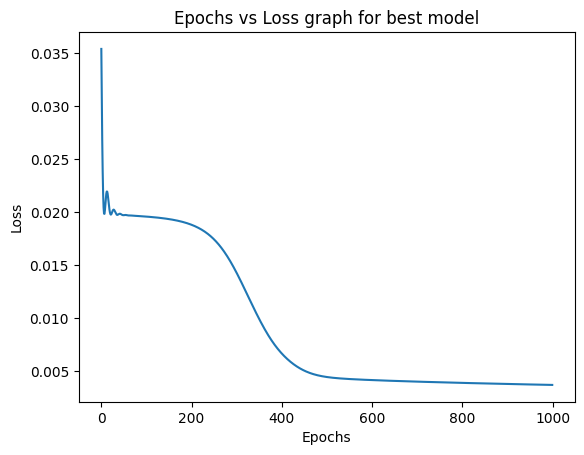

Training Losses for hidden layer 8
          0
0  0.297697
1  0.288455
2  0.279372
3  0.270452
4  0.261695
 RMSE for validation set is : 0.11035649955305626 for combination 16 & 16 & 8
 RMSE for test set is : 0.10787488179598197 for combination 16 & 16 & 8
Training Losses for hidden layer 16
          0
0  0.060232
1  0.054665
2  0.049516
3  0.044791
4  0.040497
 RMSE for validation set is : 0.0626196907290336 for combination 16 & 16 & 16
 RMSE for test set is : 0.061301789582169086 for combination 16 & 16 & 16
Training Losses for hidden layer 32
          0
0  0.249332
1  0.228309
2  0.208345
3  0.189448
4  0.171629
 RMSE for validation set is : 0.0647369119339032 for combination 16 & 16 & 32
 RMSE for test set is : 0.06323027146854733 for combination 16 & 16 & 32
Training Losses for hidden layer 64
          0
0  0.047339
1  0.035076
2  0.026523
3  0.021568
4  0.019812
 RMSE for validation set is : 0.0619809194358384 for combination 16 & 16 & 64
 RMSE for test set is : 0.060946260565

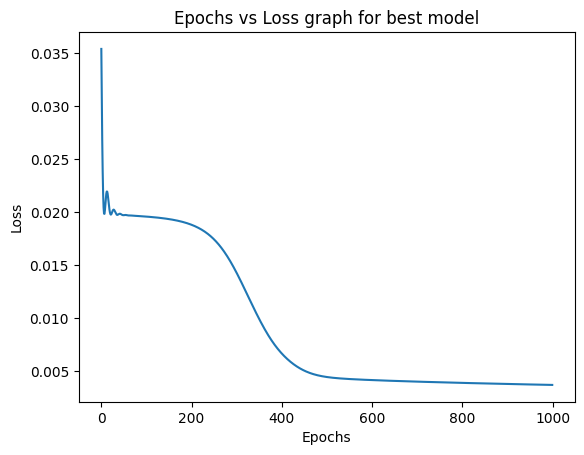

Training Losses for hidden layer 8
          0
0  0.040910
1  0.037566
2  0.034523
3  0.031786
4  0.029353
 RMSE for validation set is : 0.061815371512239495 for combination 16 & 32 & 8
 RMSE for test set is : 0.06061210118427281 for combination 16 & 32 & 8
Training Losses for hidden layer 16
          0
0  0.066294
1  0.059177
2  0.052707
3  0.046883
4  0.041698
 RMSE for validation set is : 0.06272382444401053 for combination 16 & 32 & 16
 RMSE for test set is : 0.06138067674228832 for combination 16 & 32 & 16
Training Losses for hidden layer 32
          0
0  0.048610
1  0.039644
2  0.032399
3  0.026878
4  0.023035
 RMSE for validation set is : 0.0620033059458517 for combination 16 & 32 & 32
 RMSE for test set is : 0.060955424683314885 for combination 16 & 32 & 32
Training Losses for hidden layer 64
          0
0  0.307803
1  0.256672
2  0.210718
3  0.169999
4  0.134525
 RMSE for validation set is : 0.06387054612430818 for combination 16 & 32 & 64
 RMSE for test set is : 0.062551201

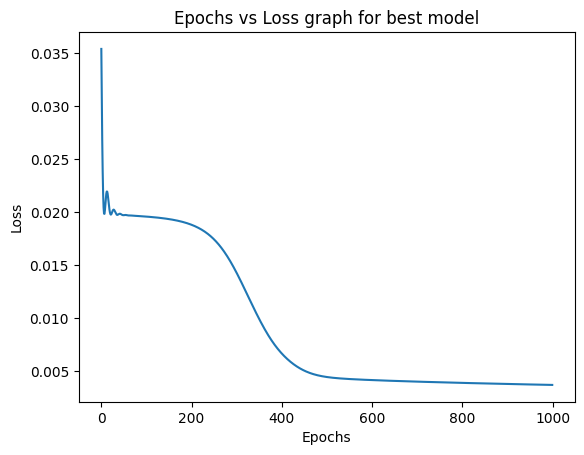

Training Losses for hidden layer 8
          0
0  0.273596
1  0.253861
2  0.234985
3  0.216984
4  0.199871
 RMSE for validation set is : 0.06841831391225961 for combination 16 & 64 & 8
 RMSE for test set is : 0.06641860103749314 for combination 16 & 64 & 8
Training Losses for hidden layer 16
          0
0  0.168028
1  0.148777
2  0.130899
3  0.114419
4  0.099357
 RMSE for validation set is : 0.06409467377687439 for combination 16 & 64 & 16
 RMSE for test set is : 0.06272701296832849 for combination 16 & 64 & 16
Training Losses for hidden layer 32
          0
0  0.021218
1  0.019763
2  0.020587
3  0.020528
4  0.019963
 RMSE for validation set is : 0.06321072666513532 for combination 16 & 64 & 32
 RMSE for test set is : 0.06254037283240085 for combination 16 & 64 & 32
Training Losses for hidden layer 64
          0
0  0.127840
1  0.087457
2  0.056799
3  0.035776
4  0.023846
 RMSE for validation set is : 0.062472478946588514 for combination 16 & 64 & 64
 RMSE for test set is : 0.061364373

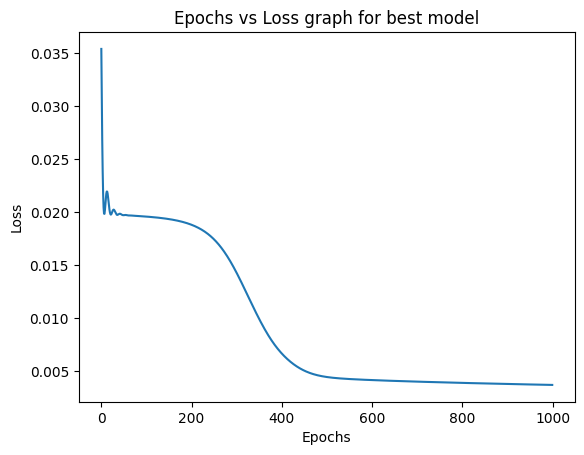

Training Losses for hidden layer 8
          0
0  0.070101
1  0.067124
2  0.064245
3  0.061465
4  0.058785
 RMSE for validation set is : 0.06457842582597496 for combination 32 & 8 & 8
 RMSE for test set is : 0.06301390695866503 for combination 32 & 8 & 8
Training Losses for hidden layer 16
          0
0  0.337511
1  0.323204
2  0.309249
3  0.295646
4  0.282398
 RMSE for validation set is : 0.07922641590561134 for combination 32 & 8 & 16
 RMSE for test set is : 0.07695609876047313 for combination 32 & 8 & 16
Training Losses for hidden layer 32
          0
0  0.270558
1  0.248805
2  0.228070
3  0.208370
4  0.189717
 RMSE for validation set is : 0.06537622431079107 for combination 32 & 8 & 32
 RMSE for test set is : 0.06383981205507 for combination 32 & 8 & 32
Training Losses for hidden layer 64
          0
0  0.214569
1  0.181524
2  0.151637
3  0.124951
4  0.101487
 RMSE for validation set is : 0.06352293081601085 for combination 32 & 8 & 64
 RMSE for test set is : 0.06209094325865341 fo

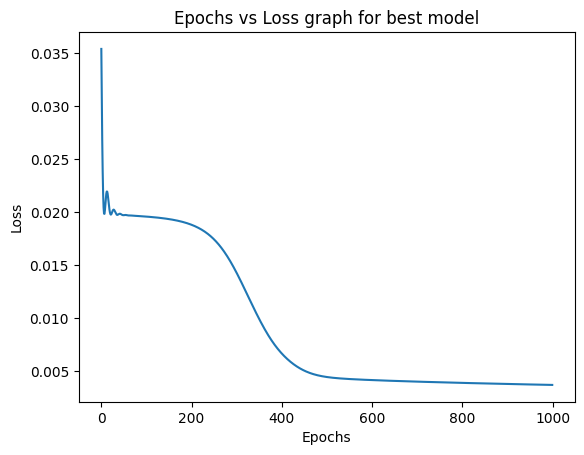

Training Losses for hidden layer 8
          0
0  0.025711
1  0.024038
2  0.022651
3  0.021553
4  0.020739
 RMSE for validation set is : 0.06176728033664977 for combination 32 & 16 & 8
 RMSE for test set is : 0.06077201385426769 for combination 32 & 16 & 8
Training Losses for hidden layer 16
          0
0  0.603213
1  0.582447
2  0.562121
3  0.542232
4  0.522772
 RMSE for validation set is : 0.10093066022569393 for combination 32 & 16 & 16
 RMSE for test set is : 0.09842058520842895 for combination 32 & 16 & 16
Training Losses for hidden layer 32
          0
0  0.233714
1  0.211442
2  0.190455
3  0.170768
4  0.152392
 RMSE for validation set is : 0.06394990353424157 for combination 32 & 16 & 32
 RMSE for test set is : 0.0625231111532987 for combination 32 & 16 & 32
Training Losses for hidden layer 64
          0
0  0.087533
1  0.067261
2  0.050757
3  0.037992
4  0.028845
 RMSE for validation set is : 0.06105853395981979 for combination 32 & 16 & 64
 RMSE for test set is : 0.05992221272

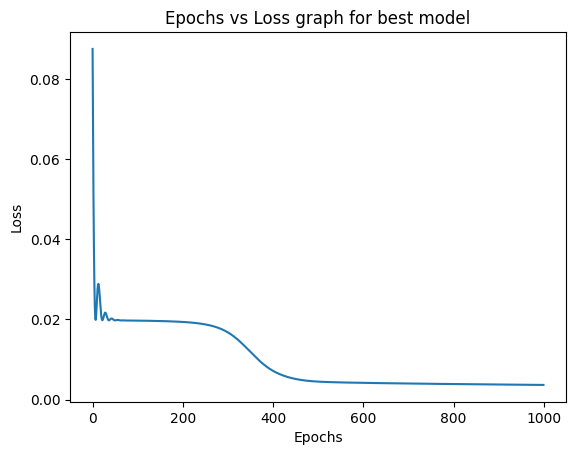

Training Losses for hidden layer 8
          0
0  0.389733
1  0.376227
2  0.362984
3  0.350007
4  0.337299
 RMSE for validation set is : 0.11194687523737101 for combination 32 & 32 & 8
 RMSE for test set is : 0.1093553414729843 for combination 32 & 32 & 8
Training Losses for hidden layer 16
          0
0  0.054350
1  0.048216
2  0.042691
3  0.037784
4  0.033501
 RMSE for validation set is : 0.06160071227866345 for combination 32 & 32 & 16
 RMSE for test set is : 0.060467812616514884 for combination 32 & 32 & 16
Training Losses for hidden layer 32
          0
0  0.253703
1  0.225765
2  0.199636
3  0.175349
4  0.152926
 RMSE for validation set is : 0.0642724104651201 for combination 32 & 32 & 32
 RMSE for test set is : 0.06285009084890714 for combination 32 & 32 & 32
Training Losses for hidden layer 64
          0
0  0.242132
1  0.196935
2  0.157006
3  0.122405
4  0.093145
 RMSE for validation set is : 0.06344337696302671 for combination 32 & 32 & 64
 RMSE for test set is : 0.06223643691

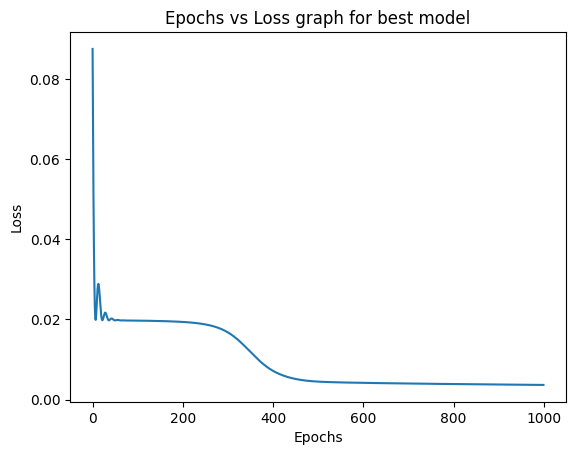

Training Losses for hidden layer 8
          0
0  0.075639
1  0.067877
2  0.060713
3  0.054157
4  0.048214
 RMSE for validation set is : 0.06269332668688994 for combination 32 & 64 & 8
 RMSE for test set is : 0.061429826727559804 for combination 32 & 64 & 8
Training Losses for hidden layer 16
          0
0  0.252662
1  0.228975
2  0.206668
3  0.185754
4  0.166238
 RMSE for validation set is : 0.064508948571244 for combination 32 & 64 & 16
 RMSE for test set is : 0.06298680636431304 for combination 32 & 64 & 16
Training Losses for hidden layer 32
          0
0  0.489383
1  0.433546
2  0.381459
3  0.333160
4  0.288666
 RMSE for validation set is : 0.06480864887535258 for combination 32 & 64 & 32
 RMSE for test set is : 0.06333914701400303 for combination 32 & 64 & 32
Training Losses for hidden layer 64
          0
0  0.019983
1  0.022079
2  0.020014
3  0.020172
4  0.020953
 RMSE for validation set is : 0.0633525884853111 for combination 32 & 64 & 64
 RMSE for test set is : 0.062608379034

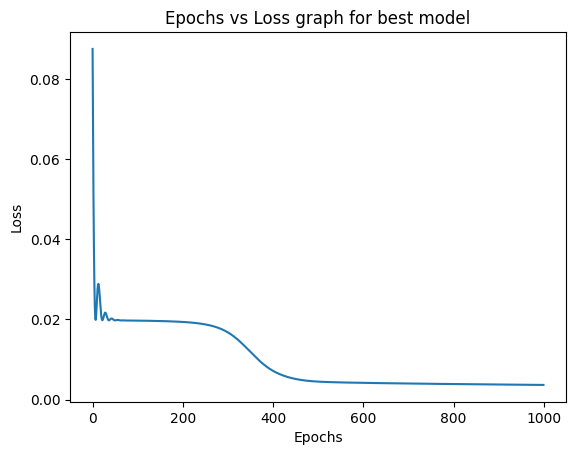

Training Losses for hidden layer 8
          0
0  0.501261
1  0.489974
2  0.478799
3  0.467741
4  0.456805
 RMSE for validation set is : 0.13633454698449515 for combination 64 & 8 & 8
 RMSE for test set is : 0.1338417200196859 for combination 64 & 8 & 8
Training Losses for hidden layer 16
          0
0  0.178954
1  0.168627
2  0.158651
3  0.149033
4  0.139778
 RMSE for validation set is : 0.06525996599944967 for combination 64 & 8 & 16
 RMSE for test set is : 0.06370835166281799 for combination 64 & 8 & 16
Training Losses for hidden layer 32
          0
0  0.116669
1  0.103390
2  0.091126
3  0.079888
4  0.069679
 RMSE for validation set is : 0.0608680095809271 for combination 64 & 8 & 32
 RMSE for test set is : 0.05966943170904859 for combination 64 & 8 & 32
Training Losses for hidden layer 64
          0
0  0.047767
1  0.035844
2  0.027319
3  0.022121
4  0.019946
 RMSE for validation set is : 0.05947984016263181 for combination 64 & 8 & 64
 RMSE for test set is : 0.05853873093667819 f

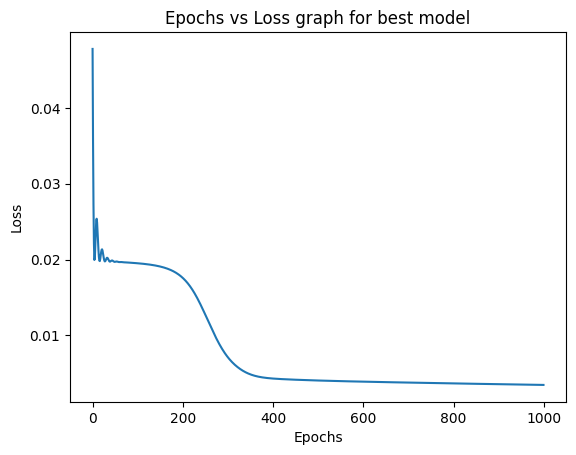

Training Losses for hidden layer 8
          0
0  0.059268
1  0.055497
2  0.051924
3  0.048551
4  0.045380
 RMSE for validation set is : 0.060459843504526815 for combination 64 & 16 & 8
 RMSE for test set is : 0.059242167475854327 for combination 64 & 16 & 8
Training Losses for hidden layer 16
          0
0  0.065266
1  0.058655
2  0.052594
3  0.047086
4  0.042132
 RMSE for validation set is : 0.061216200302270075 for combination 64 & 16 & 16
 RMSE for test set is : 0.060070653030347136 for combination 64 & 16 & 16
Training Losses for hidden layer 32
          0
0  0.828451
1  0.782171
2  0.737402
3  0.694135
4  0.652366
 RMSE for validation set is : 0.07153303387202006 for combination 64 & 16 & 32
 RMSE for test set is : 0.06952071418126597 for combination 64 & 16 & 32
Training Losses for hidden layer 64
          0
0  0.174449
1  0.141877
2  0.113270
3  0.088673
4  0.068085
 RMSE for validation set is : 0.062259780535908714 for combination 64 & 16 & 64
 RMSE for test set is : 0.06106

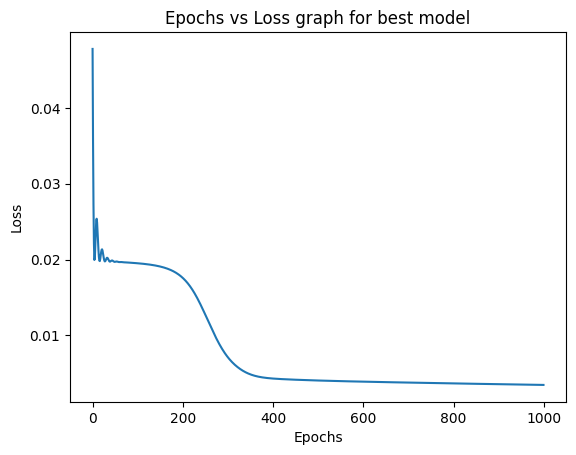

Training Losses for hidden layer 8
          0
0  0.810476
1  0.779160
2  0.748641
3  0.718927
4  0.690019
 RMSE for validation set is : 0.12119029026916293 for combination 64 & 32 & 8
 RMSE for test set is : 0.11863115301971829 for combination 64 & 32 & 8
Training Losses for hidden layer 16
          0
0  0.083281
1  0.072715
2  0.063133
3  0.054551
4  0.046977
 RMSE for validation set is : 0.06274556184339107 for combination 64 & 32 & 16
 RMSE for test set is : 0.061610432834623335 for combination 64 & 32 & 16
Training Losses for hidden layer 32
          0
0  0.083265
1  0.067903
2  0.054691
3  0.043668
4  0.034844
 RMSE for validation set is : 0.06133988603268461 for combination 64 & 32 & 32
 RMSE for test set is : 0.0602765895367906 for combination 64 & 32 & 32
Training Losses for hidden layer 64
          0
0  0.676890
1  0.594826
2  0.518662
3  0.448363
4  0.383915
 RMSE for validation set is : 0.06407106839424727 for combination 64 & 32 & 64
 RMSE for test set is : 0.0626765937

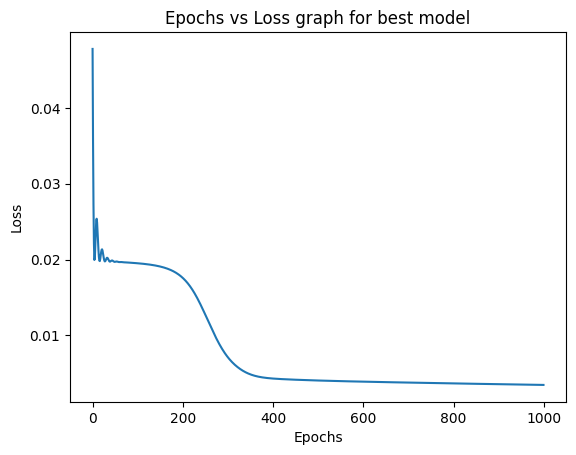

Training Losses for hidden layer 8
          0
0  1.635318
1  1.582728
2  1.531609
3  1.481957
4  1.433766
 RMSE for validation set is : 0.1424354662559612 for combination 64 & 64 & 8
 RMSE for test set is : 0.1400450961889416 for combination 64 & 64 & 8
Training Losses for hidden layer 16
          0
0  0.106758
1  0.085649
2  0.067595
3  0.052606
4  0.040645
 RMSE for validation set is : 0.062202505548914724 for combination 64 & 64 & 16
 RMSE for test set is : 0.061237391167253144 for combination 64 & 64 & 16
Training Losses for hidden layer 32
          0
0  0.265059
1  0.220073
2  0.179787
3  0.144263
4  0.113521
 RMSE for validation set is : 0.06384267132315119 for combination 64 & 64 & 32
 RMSE for test set is : 0.06270490525439723 for combination 64 & 64 & 32
Training Losses for hidden layer 64
          0
0  0.068113
1  0.042314
2  0.026542
3  0.020121
4  0.021019
 RMSE for validation set is : 0.06095538457658812 for combination 64 & 64 & 64
 RMSE for test set is : 0.0601157947

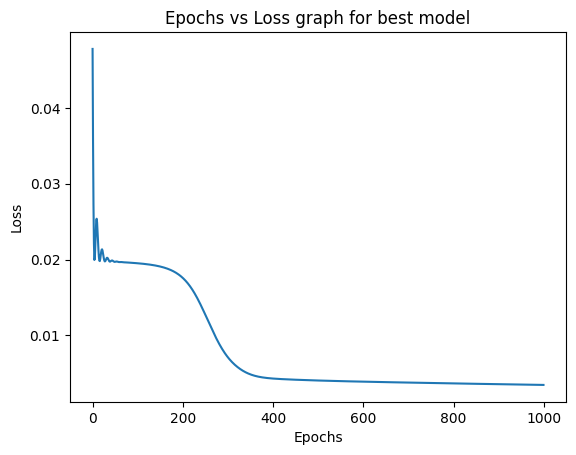

The Least Validation is 0.05947984016263181 for Hidden Layer of Size 64 & 8 & 64


In [14]:
nuerons = [8,16,32,64]
min_err = 10000
best_fn = 0
best_sn = 0
best_tn = 0
again_loss = []
epochs = 1000
opt_degree = 0
for nueronF in nuerons:
    for firstn in nuerons:
        for nueron in nuerons:
            model = TripleLayer(hidden1=nueronF,hidden2=firstn, hidden3 = nueron)
            criterion = nn.MSELoss()
            optimizer = optim.Adam(model.parameters(), lr=0.001)
            loss_arr = []
            for epoch in range(epochs):
                optimizer.zero_grad()
                model.train()
                output = model(X_train)
                loss=criterion(y_train.float(), output)
                loss_arr.append(loss.detach().numpy())
                loss.backward()
                optimizer.step()
            print(f"Training Losses for hidden layer {nueron}")
            loss_df = pd.DataFrame(loss_arr)
            print(loss_df.head())
            y_val_pred=model(X_val).detach().numpy()
            rmse =math.sqrt(mean_squared_error(y_val,y_val_pred))
            min_err = min(min_err,rmse)
            if rmse == min_err:
                again_loss = loss_arr
                best_sn = firstn
                best_fn = nueronF
                best_tn = nueron
            y_test_pred = model(X_test).detach().numpy()
            rmse_2 = math.sqrt(mean_squared_error(y_test,y_test_pred))
            print(f" RMSE for validation set is : {rmse} for combination {nueronF} & {firstn} & {nueron}")
            print(f" RMSE for test set is : {rmse_2} for combination {nueronF} & {firstn} & {nueron}")
        plt.plot(range(epochs), again_loss)
        plt.title('Epochs vs Loss graph for best model')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()  
print(f"The Least Validation is {min_err} for Hidden Layer of Size {best_fn} & {best_sn} & {best_tn}")
 

In [19]:
model = SingleLayer(hidden1=16)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_arr = []

for epoch in range(epochs):
    optimizer.zero_grad()
    model.train()
    
    output = model(X_train)
    loss = criterion(y_train.float(), output)
    loss_arr.append(loss.detach().numpy())
    
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_val_pred = model(X_test).detach().numpy()


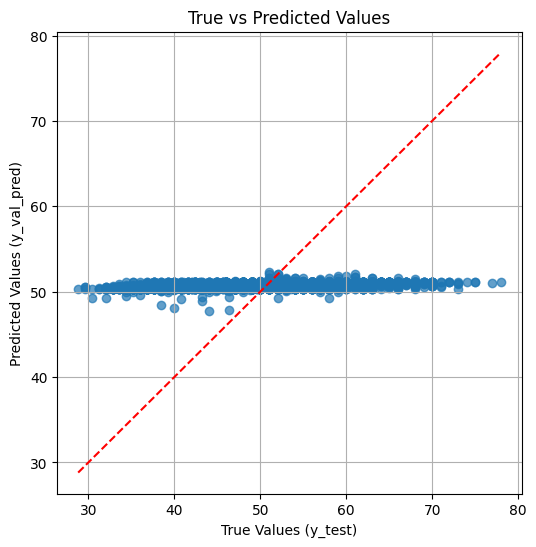

In [20]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_val_pred, alpha=0.7)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_val_pred)")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()

In [21]:
model = DoubleLayer(hidden1=16,hidden2 = 64)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_arr = []

for epoch in range(epochs):
    optimizer.zero_grad()
    model.train()
    
    output = model(X_train)
    loss = criterion(y_train.float(), output)
    loss_arr.append(loss.detach().numpy())
    
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_val_pred = model(X_test).detach().numpy()


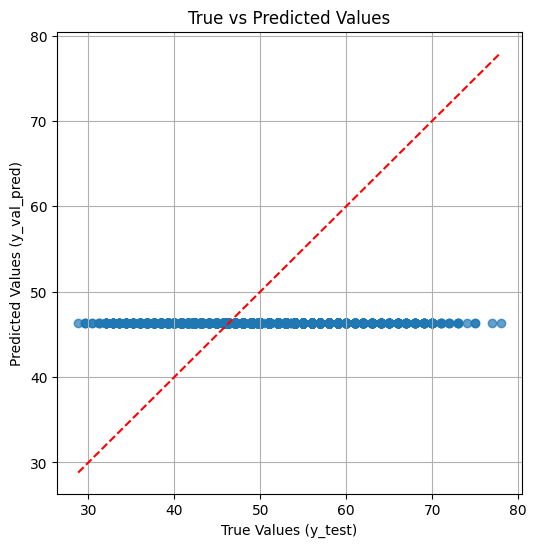

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_val_pred, alpha=0.7)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_val_pred)")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()

In [23]:
model = TripleLayer(hidden1=16,hidden2 = 8, hidden3=64)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_arr = []

for epoch in range(epochs):
    optimizer.zero_grad()
    model.train()
    
    output = model(X_train)
    loss = criterion(y_train.float(), output)
    loss_arr.append(loss.detach().numpy())
    
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_val_pred = model(X_test).detach().numpy()


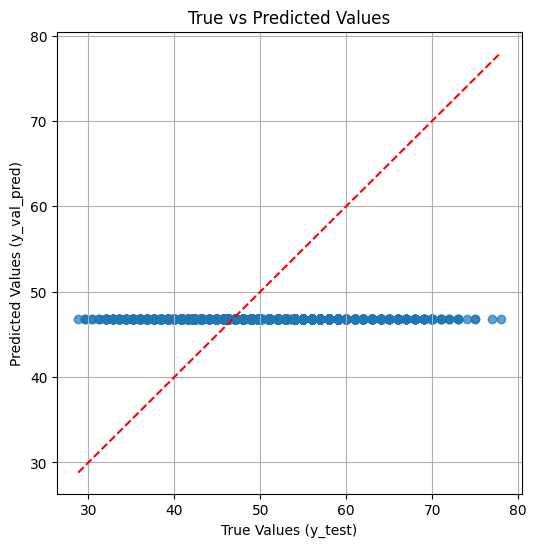

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_val_pred, alpha=0.7)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_val_pred)")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()